In [23]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [13]:
def factoral_sum(base, n):
    sum = 0.
    for i in range(n):
        sum += np.power(1./base, np.power(base, i))
    return sum

In [20]:
def print_results(bases, results):
    for (b, r) in zip(bases, results):
        print('Base {} => {}'.format(b, r))

In [198]:
min_range = 0.01
max_range = 3
steps = 10000

upper_bound_exp_precision = 8

# experiment results
base_list = np.linspace(min_range, max_range, steps, endpoint=True)
base_result = []

for b in base_list:
    base_result.append(factoral_sum(b, upper_bound_exp_precision))

print_results(base_list, base_result)

Base 0.01 => 107.04759382282138
Base 0.0102990299029903 => 104.14526748728326
Base 0.010598059805980598 => 101.40678008669836
Base 0.010897089708970898 => 98.81864340064429
Base 0.011196119611961196 => 96.36881021253475
Base 0.011495149514951496 => 94.04648688070994
Base 0.011794179417941794 => 91.84197442203828
Base 0.012093209320932094 => 89.7465331728029
Base 0.012392239223922392 => 87.75226704436191
Base 0.012691269126912692 => 85.85202414175275
Base 0.01299029902990299 => 84.03931110857278
Base 0.01328932893289329 => 82.3082190361003
Base 0.01358835883588359 => 80.6533591552485
Base 0.013887388738873888 => 79.0698068368092
Base 0.014186418641864186 => 77.55305267409524
Base 0.014485448544854486 => 76.09895962454276
Base 0.014784478447844786 => 74.70372535243482
Base 0.015083508350835084 => 73.36384905096197
Base 0.015382538253825382 => 72.07610213408307
Base 0.015681568156815682 => 70.83750228163674
Base 0.01598059805980598 => 69.64529039847936
Base 0.016279627962796278 => 68.4969

In [199]:
# exp results:
exp_result = []
for b in base_list:
    exp_result.append(1/b)
    
pi_list = np.full((steps), np.pi)
exp_list = np.full((steps), np.e)

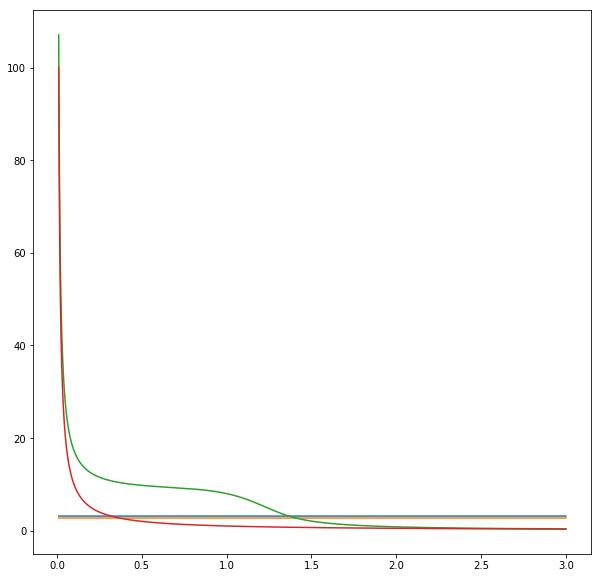

In [200]:
plt.figure(figsize=(10,10))

plt.plot(base_list, pi_list)
plt.plot(base_list, exp_list)
plt.plot(base_list, base_result)
plt.plot(base_list, exp_result)
plt.show()

In [217]:
def f_x_base_integral(x0, xn, steps):
    sum = 0.
    double_precision_step = steps*4
    width = (xn-x0)/double_precision_step
    x_cur = x0
    for s in range(double_precision_step):
        height = factoral_sum(x_cur, upper_bound_exp_precision)
        sum += (width*height)
        x_cur += width
    return sum

In [218]:
f_x_base_area = f_x_base_integral(min_range, max_range, steps)
f_x_base_area

15.720514626420311

In [219]:
def f_x_integral(x0, xn):
    return np.log(xn)-np.log(x0)

In [220]:
f_x_area = f_x_integral(min_range, max_range)
f_x_area

5.7037824746562009

In [221]:
(f_x_base_area - f_x_area)

10.01673215176411